# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sinasc_df = pd.read_csv('SINASC_RO_2019.csv')


sinasc_df.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
intervalos = [-1, 3, 5, 7, 10]
categorias = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']


sinasc_df['APGAR5_CATEGORIA'] = pd.cut(sinasc_df['APGAR5'], bins=intervalos, labels=categorias, right=False)


print(sinasc_df[['APGAR5', 'APGAR5_CATEGORIA']].head())

   APGAR5 APGAR5_CATEGORIA
0    10.0              NaN
1     9.0           normal
2    10.0              NaN
3    10.0              NaN
4    10.0              NaN


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

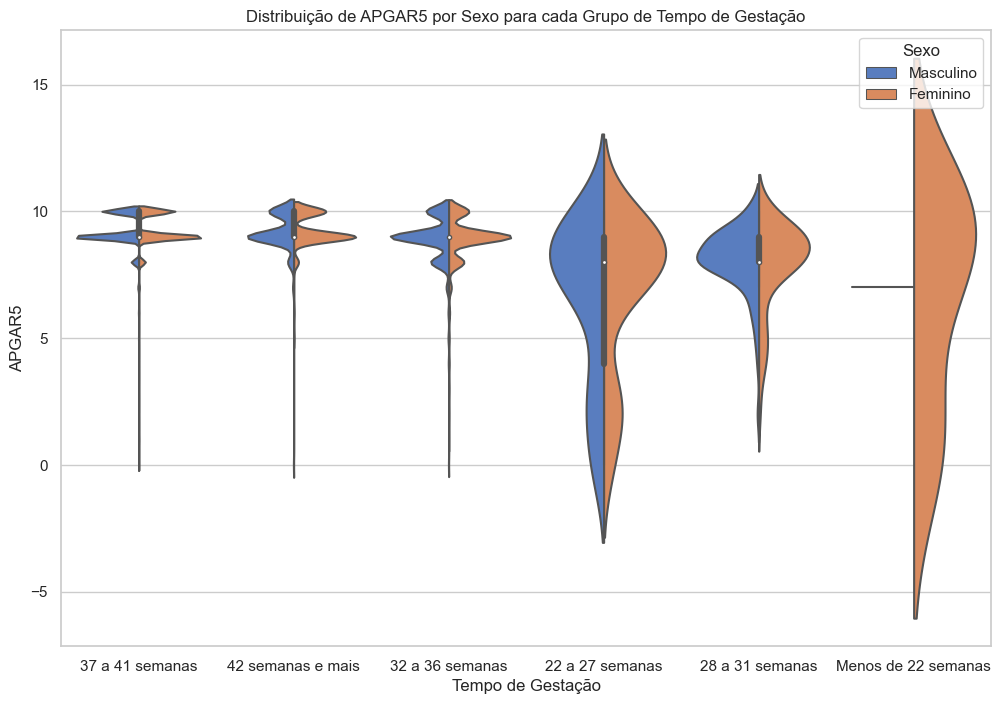

In [4]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.violinplot(data=sinasc_df, x='GESTACAO', y='APGAR5', hue='SEXO', split=True, palette='muted')
plt.title('Distribuição de APGAR5 por Sexo para cada Grupo de Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo', loc='upper right')


plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tabela_cruzada = pd.crosstab(sinasc_df['GESTACAO'], sinasc_df['APGAR5'])
print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100


print(percentuais_linha)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1000x600 with 0 Axes>

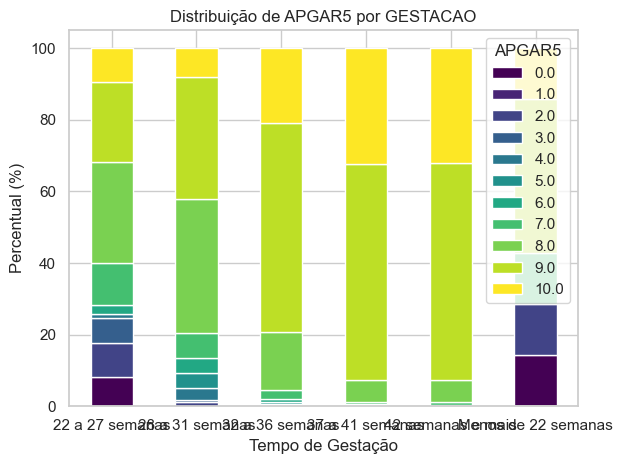

In [7]:
plt.figure(figsize=(10, 6))
percentuais_linha.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Distribuição de APGAR5 por GESTACAO')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='APGAR5')


plt.axvline(x=37, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

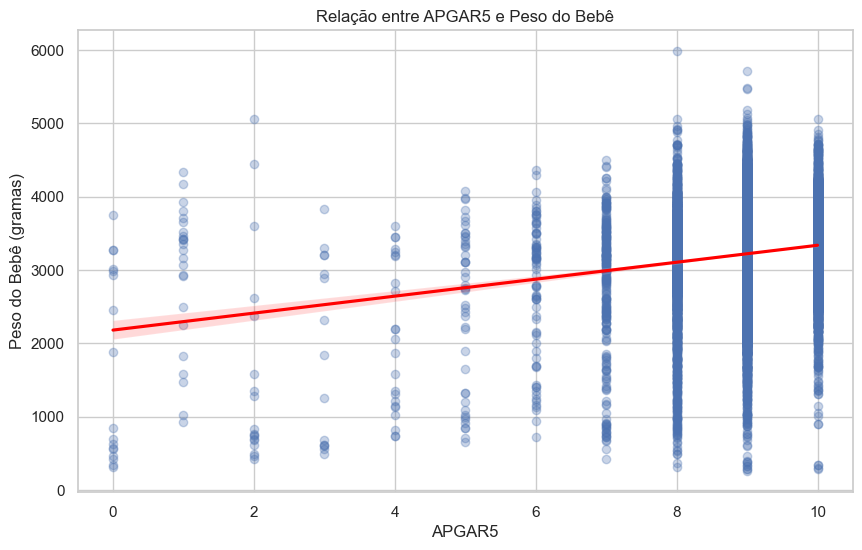

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(x='APGAR5', y='PESO', data=sinasc_df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (gramas)')
plt.grid(True)

plt.show()